In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.2.0
matplotlib 3.1.0
pandas 1.0.4


# 1: Numpy Giriş

![](./figure/numpy.png)

- Numpy kütüphanesi Numerical Python (Sayısal Python) kelimelerinin kısaltmalarından oluşur. 
- Numpy özel bir dizi tipi (array) tanımlar. NumPy dizilerinin veri tipi **ndarray**'dir. Ayrıca numpy.array olarak da isimlendirilir.
- Array kullanılarak yapılan işlemler python dilindeki mevcut liste yapısı kullanılarak yapılanlardan daha hızlıdır.
- Numpy ile tanımlanan dizilerde bütün elemanlar aynı tiptedir (örneğin int64 veya float64 gibi) ve fiziksel bellekte yanyana yer alırlar. Bu sayede dizideki herhangi bir elemana ulaşmak çok daha hızlı olur.
- Numpy ile istediğimiz boyut ve büyüklükte dizi nesneleri tanımlayabilir ve bunları hızlı bir şekilde düzenleyebiliriz.


![](figure/numpy_review.png)

**Temel ndarray komutları:**

- ndarray.ndim: Boyut sayısı. Dizilerin boyutu için aynı zamanda **rank** ifadeside kullanılmaktadır.
- ndarray.shape: Dizinin boyutları. 2x3'lük bir matris için **shape** (2,3) şeklindedir.
- ndarray.size: Bir dizideki toplam eleman sayısı. 2x3'lük bir matris için size 6'dır.
- ndarray.dtype: Dizi içindeki elemanların veri tipidir. Temel Python veri tiplerine ilave olarak numpy'da numpy.int16, numpy.int32, numpy.int64 veya numpy.float64 gibi veri tipleri bulunmaktadır.
- ndarray.itemsize: Dizisinin her bir elemanının **byte** cinsinden boyutu. 
- ndarray.data: Dizinin elemanlarının tümüdür.

## 1.1: Numpy Dizi 

In [3]:
import numpy as np
L = range(1000)

In [4]:
%timeit [i**2 for i in L]

406 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
a = np.arange(1000)

In [6]:
%timeit a**2

2.09 µs ± 219 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 1.1.1: Dizinin Yaratılması

- **1-D**

In [7]:
dizi = np.array([0, 1, 2, 3]) 
print("numpy array: ", dizi)

numpy array:  [0 1 2 3]


- Dizinin boyutunun bulunması: ndarray.ndim

In [8]:
print("Dizinin Boyutu: ", dizi.ndim)

Dizinin Boyutu:  1


- Dizinin Satır ve Sütun Sayısının Belirlenmesi: ndarray.shape 

In [9]:
print("Dizinin Satır ve Sütun Sayısı: ", dizi.shape) 

Dizinin Satır ve Sütun Sayısı:  (4,)


**Not:** Tek boyutlu (1D) olduğu için cevap 4 olarak veriliyor (bu ne satır ne de sütun sayısı). Satır ve sütun kavramları 2D için daha uygun.

In [10]:
a = np.random.randn(5) # gaussian
a

array([ 0.50407392, -0.52447628,  0.68460798,  1.90735724,  0.80789964])

In [11]:
a.shape

(5,)

In [12]:
a.T

array([ 0.50407392, -0.52447628,  0.68460798,  1.90735724,  0.80789964])

In [13]:
print(np.dot(a, a.T)) # sonucu bir matrix gibi düşünüyor olsakta. aslında tek bir sayı veriyor.

5.2885674522058554


In [14]:
# Bunun yerine bu şekilde kullanmak daha sağlıklı olacaktır. 

a = np.random.randn(5,1) # kolon vektörü (column vector)
a

array([[ 0.27691465],
       [-0.02291377],
       [-1.19522626],
       [-0.46124948],
       [-0.49537542]])

In [15]:
print(a.T)

[[ 0.27691465 -0.02291377 -1.19522626 -0.46124948 -0.49537542]]


In [16]:
print(np.dot(a, a.T)) 

[[ 7.66817222e-02 -6.34515968e-03 -3.30975660e-01 -1.27726736e-01
  -1.37176709e-01]
 [-6.34515968e-03  5.25041042e-04  2.73871446e-02  1.05689663e-02
   1.13509204e-02]
 [-3.30975660e-01  2.73871446e-02  1.42856582e+00  5.51297487e-01
   5.92085709e-01]
 [-1.27726736e-01  1.05689663e-02  5.51297487e-01  2.12751079e-01
   2.28491652e-01]
 [-1.37176709e-01  1.13509204e-02  5.92085709e-01  2.28491652e-01
   2.45396804e-01]]


- Dizinin Uzunluğu

In [17]:
print("Dizinin Uzunluğu: ", len(dizi))

Dizinin Uzunluğu:  4


- **2-D, 3-D**, ..

In [18]:
dizi1 = np.array([[1,2,3,4,5],[6,7,8,9,10]])
dizi1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [19]:
dizi2 = np.array([[0, 1, 2], [3, 4, 5]])  
dizi2

array([[0, 1, 2],
       [3, 4, 5]])

In [20]:
def print_info(elma):
    print("Element Sayısı: ", elma.size)
    print("Boyut Sayısı: ", elma.ndim)
    print("Dizinin Satır ve Sütun yapısı: ", elma.shape)
    print("Veri Tipi: ", elma.dtype)
    

In [21]:
print_info(dizi1)

Element Sayısı:  10
Boyut Sayısı:  2
Dizinin Satır ve Sütun yapısı:  (2, 5)
Veri Tipi:  int64


In [22]:
dizi3 = np.array([[[1], [2]], [[3], [4]]]) 
dizi3

array([[[1],
        [2]],

       [[3],
        [4]]])

In [23]:
print_info(dizi3)

Element Sayısı:  4
Boyut Sayısı:  3
Dizinin Satır ve Sütun yapısı:  (2, 2, 1)
Veri Tipi:  int64


- **Dizi Oluşturma Fonksiyonları**

- Eşit Aralıklı:

In [24]:
a = np.arange(10) 
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
b = np.arange(1, 9, 2) # başlangıç, bitiş, adım
b

array([1, 3, 5, 7])

- kaç tane sayı olacağının belirtilmesi

In [26]:
c = np.linspace(0, 1, 6) # başlangıç, bitiş, sayı noktaları (num-points) 
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [27]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

**Genel Diziler**
- np.zeros() , 0 matrisi

In [28]:
print(np.zeros((2,2)))

[[0. 0.]
 [0. 0.]]


- np.ones() , 1’ler matrisi

In [29]:
print(np.ones((3,3)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


- np.eye(), Birim Matris

In [30]:
print(np.eye(3,3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


- np.diag(), Diagonal

In [31]:
print(np.diag(np.array([1, 2, 3, 4])))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


- **Random (Rastgele) Sayılar**

In [32]:
a = np.random.randn(4) # uniform in [0, 1]
a

array([-0.18072945,  1.07688378,  0.54346686, -2.03439211])

In [33]:
b = np.random.randn(4)
b

array([ 0.59696315, -1.74236981, -0.17081304, -0.40868524])

In [34]:
np.random.seed(1) # rastgele seed
c = np.random.rand(4)
c

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01])

## 1.1.2: Veri Tipleri

In [35]:
a = np.array([9,10,11]) # tamsayı - integer
print(a.dtype)

int64


In [36]:
b = np.array([1.,2.,5.]) # ondalık - float
print(b.dtype)

float64


In [37]:
c = np.array([9,10,11], dtype=np.float64)
print(c.dtype)

float64


In [38]:
print(c)

[ 9. 10. 11.]


- Complex Sayılar

In [39]:
d = np.array([1+2j, 3+4j, 5+6*1j]) 
d.dtype

dtype('complex128')

- Bool 

In [40]:
e = np.array([True, False, False, True]) 
e.dtype

dtype('bool')

- String

In [41]:
f = np.array(['Gunaydın', 'Merhaba', 'Veribilimi'])
f.dtype

dtype('<U10')

![](figure/dtype.png)

**Not:** Veri tiplerinin yanındaki sayılar, veri tipinin bit boyutunu göstermektedir. Peki bu ne demek? Bellekte tek bir değeri temsil için kullanılan bit miktarı.

## 1.1.3: Basit Veri Görselleştirme

In [42]:
import matplotlib.pyplot as plt

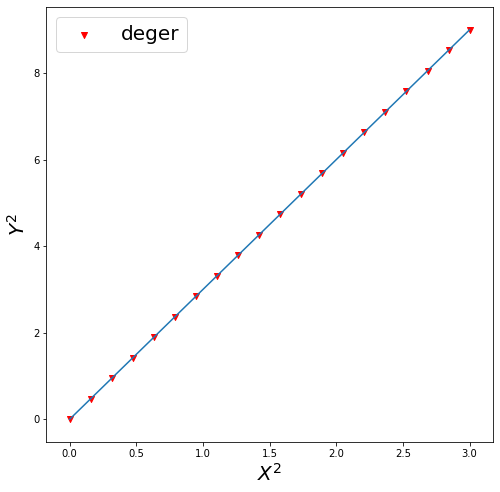

In [43]:
plt.figure(figsize=(8,8))
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y) # line plot 
#plt.plot(x, y, 'o') # dot plot
plt.scatter(x,y, color="r", marker="v", label="deger")
plt.xlabel(r"$X^2$",fontsize=20)
plt.ylabel(r"$Y^2$",fontsize=20)
plt.legend(loc="best", fontsize=20)
plt.show()

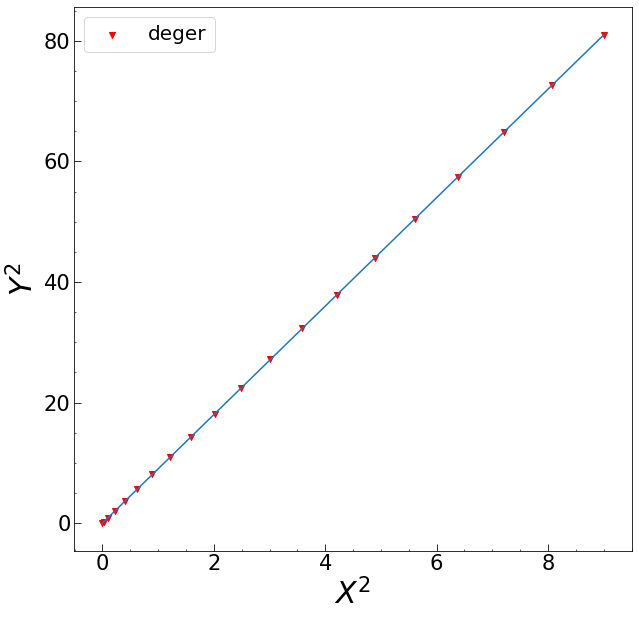

In [44]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(10,10))
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
ax.plot(x**2, y**2) # line plot 
#plt.plot(x, y, 'o') # dot plot
ax.scatter(x**2,y**2, color="r", marker="v", label="deger")
ax.set_xlabel(r"$X^2$",fontsize=30)
ax.set_ylabel(r"$Y^2$",fontsize=30)
ax.legend(loc="best", fontsize=20)

ax.tick_params(axis='x', which='major', labelsize=21)
ax.tick_params(axis='y', which='major', labelsize=21)

ax.minorticks_on()
ax.tick_params(axis='x', which='minor', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
ax.tick_params(axis='x', which='major', direction='in', length=7)
ax.tick_params(axis='y', which='major', direction='in',length=7)
plt.show()

- **2D diziler (örneğin resim gibi):**

In [45]:
image = np.random.randn(30, 30)
image

array([[-5.28171752e-01, -1.07296862e+00,  8.65407629e-01,
        -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
         3.19039096e-01, -2.49370375e-01,  1.46210794e+00,
        -2.06014071e+00, -3.22417204e-01, -3.84054355e-01,
         1.13376944e+00, -1.09989127e+00, -1.72428208e-01,
        -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
        -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,
         5.02494339e-01,  9.00855949e-01, -6.83727859e-01,
        -1.22890226e-01, -9.35769434e-01, -2.67888080e-01,
         5.30355467e-01, -6.91660752e-01, -3.96753527e-01],
       [-6.87172700e-01, -8.45205641e-01, -6.71246131e-01,
        -1.26645989e-02, -1.11731035e+00,  2.34415698e-01,
         1.65980218e+00,  7.42044161e-01, -1.91835552e-01,
        -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
         5.08077548e-02, -6.36995647e-01,  1.90915485e-01,
         2.10025514e+00,  1.20158952e-01,  6.17203110e-01,
         3.00170320e-01, -3.52249846e-01, -1.14251820e+

In [46]:
print_info(image)

Element Sayısı:  900
Boyut Sayısı:  2
Dizinin Satır ve Sütun yapısı:  (30, 30)
Veri Tipi:  float64


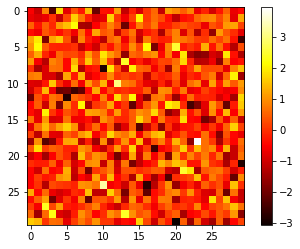

In [47]:
plt.imshow(image, cmap=plt.cm.hot) 
plt.colorbar()
plt.show()

## 1.1.4: İndeksleme - Bölümleme

In [48]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
a[0], a[2], a[-1]

(0, 2, 9)

In [50]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [51]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [52]:
np.arange(3)

array([0, 1, 2])

In [53]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [54]:
a[1,2]

0

In [55]:
a[2, 1] = 10
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [56]:
a[0]

array([0, 0, 0])

**Not:**
- 2B'de, ilk boyut satırlara, ikincisi sütunlara karşılık gelir.
- Çok boyutlu a için, a[0] belirtilmemiş boyutlardaki tüm elemanlar alınarak yorumlanır.

**Bölümleme**: Diğer Python dizileri gibi diziler de bölümlenebilir.

In [57]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
a[2:9]

array([2, 3, 4, 5, 6, 7, 8])

In [59]:
a[2:9:3] # [Başlangıç:Son:Adım] 

array([2, 5, 8])

In [60]:
a[:4]

array([0, 1, 2, 3])

In [61]:
a[1:3]

array([1, 2])

In [62]:
a[::2]

array([0, 2, 4, 6, 8])

In [63]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

![](figure/slicing.png)

- Atama ve bölümleme birleştirilebilir

In [64]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [66]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [67]:
b[::-1]

array([4, 3, 2, 1, 0])

In [68]:
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## 1.1.5: Kopyalama ve Görümler (copies and views)

- Bir dilimleme işlemi, orijinal dizi üzerinde bir görünüm oluşturur, bu sadece dizi verilerine erişmenin bir yoludur. Böylece orijinal dizi hafızaya kopyalanmaz. İki dizinin aynı bellek bloğunu paylaşıp paylaşmadığını kontrol etmek için np.may_share_memory () kullanabilirsiniz. Ancak, burada sezgisel (heuristics) yöntemler kullandığını ve size yanlış pozitifler verebileceğini unutmayın.

In [69]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [71]:
np.may_share_memory(a, b)

True

In [72]:
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [73]:
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [74]:
a = np.arange(10)

In [75]:
c = a[::2].copy()

In [76]:
c

array([0, 2, 4, 6, 8])

In [77]:
c[0] = 12
c

array([12,  2,  4,  6,  8])

In [78]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
np.may_share_memory(a, c)

False

## 1.1.6: Fancy İndekleme - Mask

- Bool ifadeyle indeksleme

In [80]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [81]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [82]:
mask = (a % 3 == 0)

In [83]:
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [84]:
extract_from_a = a[mask] # or, a[a%3==0]
extract_from_a

array([ 3,  0,  9,  6,  0, 12])

In [85]:
a[mask] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

- Tamsayılar ile indeksleme

In [86]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [87]:
a[[2,3,2,4,2]] 

array([20, 30, 20, 40, 20])

In [88]:
a[[7,9]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

**Dizi Birleştirme (Stacking)**

In [89]:
a = np.array([[2,4,6], [1,2,3]])
b = np.array([[7,8,9], [4,3,2]])

In [90]:
a

array([[2, 4, 6],
       [1, 2, 3]])

In [91]:
print_info(a)

Element Sayısı:  6
Boyut Sayısı:  2
Dizinin Satır ve Sütun yapısı:  (2, 3)
Veri Tipi:  int64


In [92]:
print_info(b)

Element Sayısı:  6
Boyut Sayısı:  2
Dizinin Satır ve Sütun yapısı:  (2, 3)
Veri Tipi:  int64


In [93]:
np.vstack((a,b))

array([[2, 4, 6],
       [1, 2, 3],
       [7, 8, 9],
       [4, 3, 2]])

In [94]:
np.hstack((a,b))

array([[2, 4, 6, 7, 8, 9],
       [1, 2, 3, 4, 3, 2]])

## 1.2: Dizilerdeki Numerik Operatörler

In [95]:
a = np.array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [96]:
a + 1

array([2, 3, 4, 5])

In [97]:
2**a

array([ 2,  4,  8, 16])

In [98]:
np.ones(4)

array([1., 1., 1., 1.])

In [99]:
b = np.ones(4) + 1
b

array([2., 2., 2., 2.])

In [100]:
a - b

array([-1.,  0.,  1.,  2.])

In [101]:
a * b

array([2., 4., 6., 8.])

In [102]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

In [103]:
a = np.arange(10000)
%timeit a + 1  

7.81 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [104]:
l = range(10000)
%timeit [i+1 for i in l]

1.02 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Dizilerin Çarpımı** - Matrislerin değil

In [105]:
c = np.ones((3, 3))
c * c                   

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

- Matris Çarpımı

In [106]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

- Karşılaştırma Operatörleri

In [107]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])

In [108]:
a == b

array([False,  True, False,  True])

In [109]:
a > b

array([False, False,  True, False])

- Logic Operatörleri

In [110]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [111]:
a

array([ True,  True, False, False])

In [112]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [113]:
np.logical_and(a, b)

array([ True, False, False, False])

- Trigonotmetrik ifadeler

In [114]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [115]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [116]:
np.cos(a)

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362])

## 1.2.1: Temel İstatistik

In [117]:
x = np.linspace(0,1000,300)
x

array([   0.        ,    3.34448161,    6.68896321,   10.03344482,
         13.37792642,   16.72240803,   20.06688963,   23.41137124,
         26.75585284,   30.10033445,   33.44481605,   36.78929766,
         40.13377926,   43.47826087,   46.82274247,   50.16722408,
         53.51170569,   56.85618729,   60.2006689 ,   63.5451505 ,
         66.88963211,   70.23411371,   73.57859532,   76.92307692,
         80.26755853,   83.61204013,   86.95652174,   90.30100334,
         93.64548495,   96.98996656,  100.33444816,  103.67892977,
        107.02341137,  110.36789298,  113.71237458,  117.05685619,
        120.40133779,  123.7458194 ,  127.090301  ,  130.43478261,
        133.77926421,  137.12374582,  140.46822742,  143.81270903,
        147.15719064,  150.50167224,  153.84615385,  157.19063545,
        160.53511706,  163.87959866,  167.22408027,  170.56856187,
        173.91304348,  177.25752508,  180.60200669,  183.94648829,
        187.2909699 ,  190.63545151,  193.97993311,  197.32441

In [118]:
np.sum(x) #toplam

150000.0

In [119]:
x.sum()

150000.0

In [120]:
np.mean(x) #ortalama

500.0

In [121]:
np.median(x) #median

500.0

In [122]:
np.std(x) #standart sapma

289.6389941534551

In [123]:
np.var(x) #varyans

83890.7469342252

In [124]:
np.max(x)

1000.0

In [125]:
np.min(x)

0.0

In [126]:
x.argmin()

0

In [127]:
x.argmax()

299

In [128]:
x = np.array([np.arange(0,9), np.arange(0,9)])
x

array([[0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [129]:
x.sum(axis=0)   # sütunlar üzerinden

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [130]:
x.sum(axis=1)   # satırlar üzerinden

array([36, 36])

## 1.2.2: Array Manipülasyonu

- Düzleştirme (Flattening)

In [131]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [132]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [133]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [134]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

- Reshaping

In [135]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [136]:
print_info(a)

Element Sayısı:  6
Boyut Sayısı:  2
Dizinin Satır ve Sütun yapısı:  (2, 3)
Veri Tipi:  int64


In [137]:
b = a.ravel()
b

array([1, 2, 3, 4, 5, 6])

In [138]:
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

- Boyut Ekleme

In [139]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [140]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [141]:
z[:, np.newaxis].shape

(3, 1)

In [142]:
z[np.newaxis, :]

array([[1, 2, 3]])

In [143]:
z[np.newaxis, :].shape

(1, 3)

## 1.3: Matris İşlemleri

- 4 İşlem (eleman-eleman)

In [144]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
x

array([[1, 2],
       [3, 4]])

In [145]:
y

array([[5, 6],
       [7, 8]])

- Eleman-Eleman Toplama

In [146]:
print(x + y)
print(np.add(x, y))

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]


- Eleman-Eleman Çıkarma

In [147]:
print(x - y)
print(np.subtract(x, y))

[[-4 -4]
 [-4 -4]]
[[-4 -4]
 [-4 -4]]


- Eleman-Eleman Çarpma

In [148]:
print(x * y)
print(np.multiply(x, y))

[[ 5 12]
 [21 32]]
[[ 5 12]
 [21 32]]


- Eleman-Eleman Bölme

In [149]:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


**Matris Çarpımlarında ise np.dot() kullanılır.**

In [150]:
a = np.array([[1,7],[2,4]])
b = np.array([[3,3],[5,2]])
print(np.dot(a,b)) 

[[38 17]
 [26 14]]


![](figure/matrix.png)